In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from multiprocessing import Pool
import seaborn as sns
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [2]:
fte = [1, 1.019, 1.034615816, 1.042234766, 1.033187519, 1.038607703, 1.04839371, 1.050773934, 1.042229608, 1.034315198]
accuracies = [[0.24843, 0.26381, 0.27146000000000003, 0.27658, 0.28040999999999994, 0.28084, 0.28303, 0.28528, 0.2854, 0.28627], [0.22600000000000003, 0.23356999999999997, 0.23880000000000004, 0.24147000000000002, 0.24257, 0.24334999999999996, 0.24586000000000002, 0.24766000000000005, 0.24786999999999998], [0.28675999999999996, 0.29086, 0.29371, 0.29562000000000005, 0.29655, 0.29723999999999995, 0.29822, 0.29889], [0.30799999999999994, 0.31039999999999995, 0.31035, 0.31135999999999997, 0.31247, 0.31389000000000006, 0.31388000000000005], [0.21029, 0.21322000000000002, 0.21385, 0.21591, 0.21760000000000002, 0.21810000000000002], [0.23757999999999999, 0.23928, 0.2398, 0.24196, 0.24301], [0.31723999999999997, 0.31798, 0.31873999999999997, 0.31857], [0.27501999999999993, 0.27646000000000004, 0.27768000000000004], [0.30582, 0.30474999999999997], [0.24224]]
te = []
bte = []

In [3]:
for which_task in range(10):
    acc_z = accuracies[which_task]
    calc_bte = [((1-acc_z[0])/x) for x in ([1-a for a in acc_z])]
    bte.append(calc_bte)
    te.append([fte[which_task]*y for y in calc_bte])

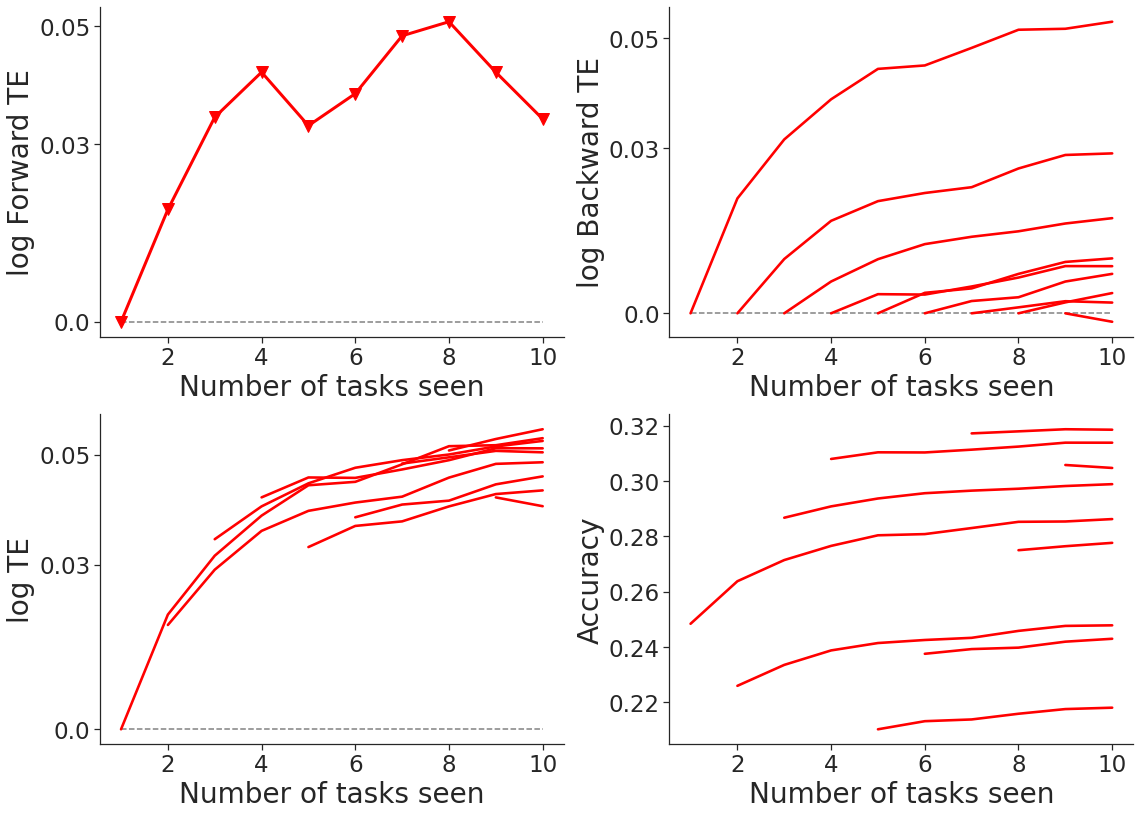

In [6]:
sns.set(style='ticks')
sns.despine

n_tasks=10
clr = ["#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#CCCC00"]
#c = sns.color_palette(clr, n_colors=len(clr))

fontsize=28
ticksize=23

log_lbl = np.round(
    np.log([1, 1.03, 1.05]),
    2
)

# Plot FTE

fig, ax = plt.subplots(2,2, figsize=(16,11.5))
#fig.suptitle('ntrees = '+str(ntrees),fontsize=25)
ax[0][0].plot(np.arange(1,n_tasks+1), fte, c='red', marker='v', markersize=12, linewidth=3)
ax[0][0].hlines(1, 1,n_tasks, colors='grey', linestyles='dashed',linewidth=1.5)
ax[0][0].tick_params(labelsize=ticksize)
ax[0][0].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[0][0].set_ylabel('log Forward TE', fontsize=fontsize)
ax[0][0].set_yticks([1, 1.03, 1.05])

right_side = ax[0][0].spines["right"]
right_side.set_visible(False)
top_side = ax[0][0].spines["top"]
top_side.set_visible(False)

labels = [item.get_text() for item in ax[0][0].get_yticklabels()]

for ii,_ in enumerate(labels):
    labels[ii] = str(log_lbl[ii])

ax[0][0].set_yticklabels(labels)

# Plot BTE

for i in range(n_tasks):

    et = np.asarray(bte[i])

    ns = np.arange(i + 1, n_tasks + 1)
    ax[0][1].plot(ns, et, c='red', linewidth = 2.6)
    
ax[0][1].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[0][1].set_ylabel('log Backward TE', fontsize=fontsize)
#ax[0][1].set_xticks(np.arange(1,10))
ax[0][1].set_yticks([1, 1.03, 1.05])
ax[0][1].tick_params(labelsize=ticksize)
ax[0][1].hlines(1, 1,n_tasks, colors='grey', linestyles='dashed',linewidth=1.5)

right_side = ax[0][1].spines["right"]
right_side.set_visible(False)
top_side = ax[0][1].spines["top"]
top_side.set_visible(False)

labels = [item.get_text() for item in ax[0][1].get_yticklabels()]

for ii,_ in enumerate(labels):
    labels[ii] = str(log_lbl[ii])

ax[0][1].set_yticklabels(labels)

# Plot TE

for i in range(n_tasks):

    et = np.asarray(te[i])

    ns = np.arange(i + 1, n_tasks + 1)
    ax[1][0].plot(ns, et, c='red', linewidth = 2.6)
    
ax[1][0].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[1][0].set_ylabel('log TE', fontsize=fontsize)
#ax[1][0].set_xticks(np.arange(1,10))
ax[1][0].set_yticks([1, 1.03, 1.05])
ax[1][0].tick_params(labelsize=ticksize)
ax[1][0].hlines(1, 1,n_tasks, colors='grey', linestyles='dashed',linewidth=1.5)

right_side = ax[1][0].spines["right"]
right_side.set_visible(False)
top_side = ax[1][0].spines["top"]
top_side.set_visible(False)

labels = [item.get_text() for item in ax[1][0].get_yticklabels()]

for ii,_ in enumerate(labels):
    labels[ii] = str(log_lbl[ii])

ax[1][0].set_yticklabels(labels)

# Plot accuracy

for i in range(n_tasks):
    acc_p = np.asarray(accuracies[i])
    ns = np.arange(i + 1, n_tasks + 1)

    ax[1][1].plot(ns, acc_p , c='red', linewidth = 2.6)
            
#ax[1][1].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=22)
ax[1][1].set_xlabel('Number of tasks seen', fontsize=fontsize)
ax[1][1].set_ylabel('Accuracy', fontsize=fontsize)
ax[1][1].tick_params(labelsize=ticksize)

right_side = ax[1][1].spines["right"]
right_side.set_visible(False)
top_side = ax[1][1].spines["top"]
top_side.set_visible(False)